In [4]:
# !pip install brian2

In [1]:
import brian2 
import matplotlib.pyplot
import numpy
from brian2.units.fundamentalunits import Quantity

In [7]:
# type(brian2.StateMonitor(G,'v',record=True))

brian2.groups.neurongroup.NeuronGroup

In [5]:
class NeuronState():
    """
    General neuron differential eqs
    """
    def __init__(self,thres:float,reset:float,tau:Quantity,eqs:str)-> None:
        self.tau = tau
        self.eqs = eqs
        self.thres = thres
        self.reset = reset
        self.neuronGroup = None
        self.StateMonitor = None
        self.SpikeMonitor = None

    
    def set_neuronGroup(self,n_neuron:int,method:str,flag:int=0) -> None:
        if flag:
            self.neuronGroup = brian2.NeuronGroup(n_neuron,self.eqs,threshold=f'v>{self.thres}',reset=f'v = {self.reset}',method = method)
            print('thres')
        else:
            self.neuronGroup = brian2.NeuronGroup(n_neuron,self.eqs,method=method)
            print('wthres')
        return
        
    def get_neuronGroup(self)->brian2.groups.neurongroup.NeuronGroup:
        return self.neuronGroup

    def set_StateMonitor(self)->None:
        self.StateMonitor = brian2.StateMonitor(self.neuronGroup,'v',record =True)
        return
    
    def get_StateMonitor(self)-> brian2.monitors.statemonitor.StateMonitor:
        return self.StateMonitor
    
    def set_SpikeMonitor(self)->None:
        self.SpikeMonitor = brian2.SpikeMonitor(self.neuronGroup)
        return
    
    def get_SpikeMonitor(self)-> brian2.monitors.spikemonitor.SpikeMonitor:
        return self.SpikeMonitor
    
    
    def runsim(self,time:int=100)->None:        
        G = self.neuronGroup
        M = self.StateMonitor
        spikemon = self.SpikeMonitor
        print(f'Before = {G.v[0]}')
        brian2.run(time*brian2.ms)
        print(f'Before = {G.v[0]}')



In [33]:
tau = 10*brian2.ms
first_order_eq = '''
dv/dt = (1-v)/tau :1
'''


thres
Before = 0.0
Before = 0.2882296772373889


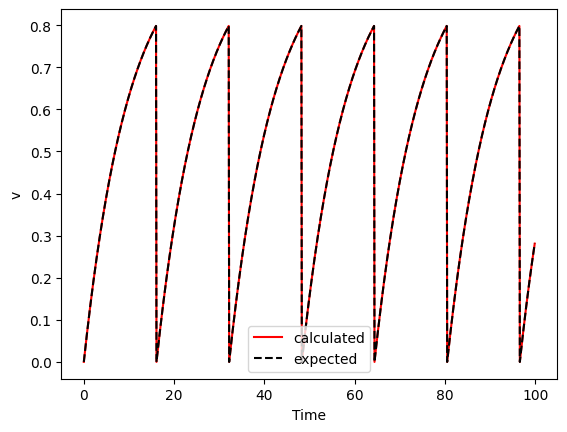

In [41]:
brian2.start_scope()
obj = NeuronState(0.8,0,tau,first_order_eq)
obj.set_neuronGroup(1,'exact',1)
obj.set_StateMonitor()
obj.runsim()
M = obj.get_StateMonitor()
matplotlib.pyplot.plot(M.t/brian2.ms,M.v[0],'r',label = 'calculated')
matplotlib.pyplot.plot(M.t/brian2.ms,M.v[0],'k--',label = 'expected')
matplotlib.pyplot.xlabel('Time')
matplotlib.pyplot.ylabel('v')
matplotlib.pyplot.legend()

thres
Before = 0.4422002949545447
Before = 0.09754115099857148


Text(0, 0.5, 'Neuron index')

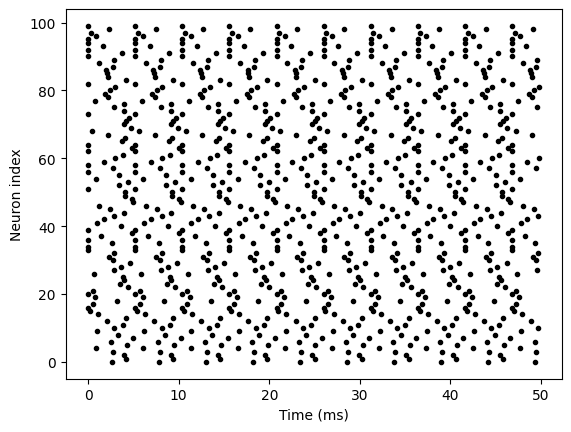

In [6]:
tau = 10*brian2.ms
eqs = '''
dv/dt = (2-v)/tau : 1
'''
brian2.start_scope()
obj = NeuronState(0.8,0,tau,eqs)
obj.set_neuronGroup(100,'exact',1)
# obj.set_StateMonitor()
obj.set_SpikeMonitor()
G = obj.get_neuronGroup()
G.v ='rand()'
# obj.neuronGroup = G
obj.runsim(50)
spikemon = obj.get_SpikeMonitor()
matplotlib.pyplot.plot(spikemon.t/brian2.ms,spikemon.i,'.k')
matplotlib.pyplot.xlabel('Time (ms)')
matplotlib.pyplot.ylabel('Neuron index')

Before = 0.0
Before = 0.2390164603994286


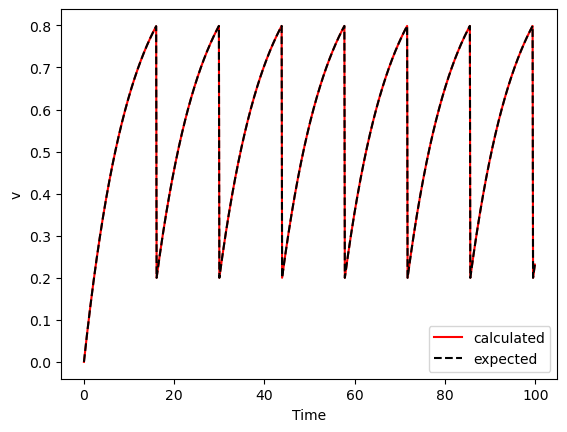

In [23]:
"""
solving the 1d equation using 1 neuron
"""
tau = 10*brian2.ms
first_order_eq = '''
dv/dt = (1-v)/tau :1
'''

# definig group of neuron for solving the differential equation using single neuron 
# G  = brian2.NeuronGroup(1,first_order_eq,'exact')
# adding thresold for spikes
G  = brian2.NeuronGroup(1,first_order_eq,threshold='v>0.8',reset='v = 0.2',method = 'exact')

#statemonitor
M = brian2.StateMonitor(G,'v',record=True)
print(f'Before = {G.v[0]}')
brian2.run(100*brian2.ms)
print(f'Before = {G.v[0]}')

matplotlib.pyplot.plot(M.t/brian2.ms,M.v[0],'r',label = 'calculated')
matplotlib.pyplot.plot(M.t/brian2.ms,M.v[0],'k--',label = 'expected')
matplotlib.pyplot.xlabel('Time')
matplotlib.pyplot.ylabel('v')
matplotlib.pyplot.legend()




In [10]:
#expected value
1-numpy.exp(-10)

0.9999546000702375

In [29]:
brian2.start_scope()
G  = brian2.NeuronGroup(1,first_order_eq,threshold='v>0.8',reset='v = 0.2',method = 'exact')
spike_moni = brian2.SpikeMonitor(G)
brian2.run(50*brian2.ms)
print(f'spike times: {spike_moni.t[:]}')

spike times: [16.  29.9 43.8] ms


In [ ]:
#introducing refractioness in neuron
